In [62]:
from pathlib import Path
from scipy import io as sio
from pygsp import graphs
import numpy as np

path_Glasser='S4B2/GSP/Glasser_masker.nii.gz'

connectivity_high = np.load('S4B2/Generated_Data/connectivity_low_high.npz')['connectivity_high_isc']

connectivity_low = np.load('S4B2/Generated_Data/connectivity_high_isc.npz')['connectivity_low_isc']
for i in range(360):

    connectivity_high[i][i] =0
    connectivity_low[i][i] =0

coordinates = sio.loadmat('S4B2/GSP/Glasser360_2mm_codebook.mat')['codeBook'] # coordinates in brain space


#G_Comb = graphs.Graph(connectivity,gtype='HCP subject',lap_type='combinatorial',coords=coordinates)# combinatorial laplacian
G_low=graphs.Graph(connectivity_low,gtype='HCP subject',lap_type='combinatorial',coords=coordinates) #
G_high=graphs.Graph(connectivity_high,gtype='HCP subject',lap_type='combinatorial',coords=coordinates) #

#G_RandW=graphs.Graph(connectivity,gtype='HCP subject',lap_type='normalized',coords=coordinates) #
print(G.is_connected())


G_low.set_coordinates('spring')
D=np.array(G.dw)
G_high.set_coordinates('spring')

D.shape
G.compute_fourier_basis()

FileNotFoundError: [Errno 2] No such file or directory: 'S4B2/Generated_Data/connectivity_low_high.npz'

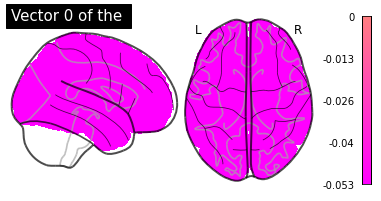

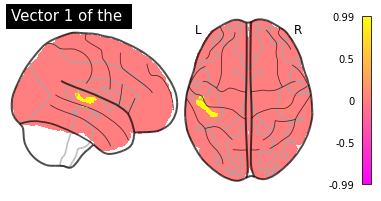

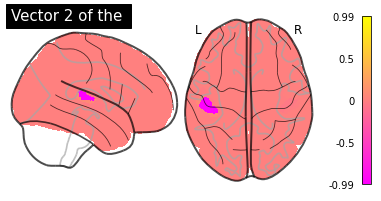

In [60]:
from nilearn.regions import signals_to_img_labels  
# load nilearn label masker for inverse transform
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
from nilearn.datasets import fetch_icbm152_2009
from nilearn import image, plotting
from nilearn import datasets
from os.path import join as opj


path_Glasser = 'S4B2/GSP/Glasser_masker.nii.gz'


mnitemp = fetch_icbm152_2009()
mask_mni=image.load_img(mnitemp['mask'])
glasser_atlas=image.load_img(path_Glasser)


#print(NiftiMasker.__doc__)

for i in range(3):
    signal=[]
    U0_brain=[]
    signal=np.expand_dims(np.array(G.U[:, i]), axis=0) # add dimension 1 to signal array
    U0_brain = signals_to_img_labels(signal,'S4B2/GSP/Glasser_masker.nii.gz',mnitemp['mask'])
    plotting.plot_glass_brain(U0_brain,title=f'Vector {i} of the ',colorbar=True,plot_abs=False,cmap='spring',display_mode='xz')


In [40]:

signal=[]
U0_brain=[]
signal=np.expand_dims(np.array(G.U[:, 0]), axis=0) # add dimension 1 to signal array
U0_brain = signals_to_img_labels(signal,'S4B2/GSP/Glasser_masker.nii.gz',mnitemp['mask'])
plotting.plot_glass_brain(U0_brain,title='U',colorbar=True,plot_abs=False,cmap='spring',display_mode='xz')

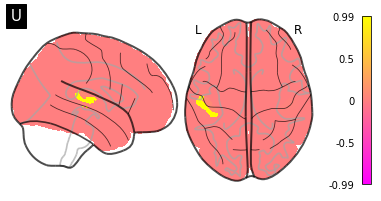

In [52]:

signal=[]
U0_brain=[]
signal=np.expand_dims(np.array(G.U[:,1]), axis=0) # add dimension 1 to signal array
U0_brain = signals_to_img_labels(signal,'S4B2/GSP/Glasser_masker.nii.gz',mnitemp['mask'])
plotting.plot_glass_brain(U0_brain,title='U',colorbar=True,plot_abs=False,cmap='spring',display_mode='xz')


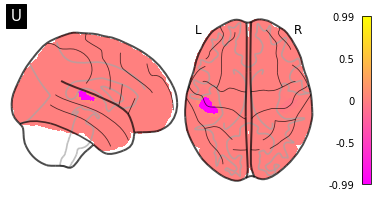

In [53]:

signal=[]
U0_brain=[]
signal=np.expand_dims(np.array(G.U[:, 2]), axis=0) # add dimension 1 to signal array
U0_brain = signals_to_img_labels(signal,'S4B2/GSP/Glasser_masker.nii.gz',mnitemp['mask'])
plotting.plot_glass_brain(U0_brain,title='U',colorbar=True,plot_abs=False,cmap='spring',display_mode='xz')
